In [14]:
import pandas as pd
from datetime import datetime

In [22]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv('shampoo.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(df.shape)
df.sample(5)

(36, 1)


,Sales
Month,
1901-11-01,336.5
1902-02-01,149.5
1902-09-01,289.9
1901-04-01,119.3
1902-12-01,342.3


In [28]:
df.index.to_series().describe(datetime_is_numeric=True)

count                     36
mean     1902-06-16 12:00:00
min      1901-01-01 00:00:00
25%      1901-09-23 12:00:00
50%      1902-06-16 00:00:00
75%      1903-03-08 18:00:00
max      1903-12-01 00:00:00
Name: Month, dtype: object

<AxesSubplot:xlabel='Month'>

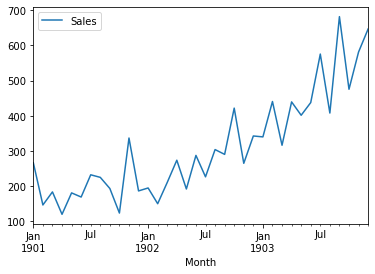

In [29]:
df.plot()

                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613
1901-01-04  254.377419
1901-01-05  250.503226


<AxesSubplot:xlabel='Month'>

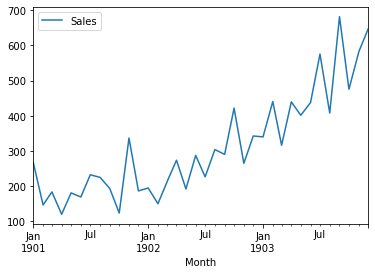

In [41]:
daily = df.resample('D').interpolate('linear')
print(daily.head(5))
daily.plot()


                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  258.630160
1901-01-03  251.560886
1901-01-04  244.720748
1901-01-05  238.109746


<AxesSubplot:xlabel='Month'>

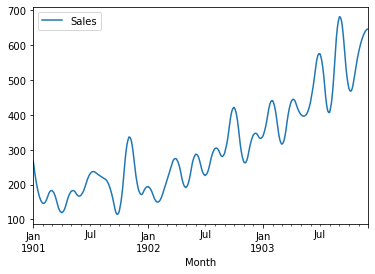

In [43]:
daily = df.resample('D').interpolate('spline', order=2)
print(daily.head(5))
daily.plot()


            Sales
Month            
1901-03-31  595.0
1901-06-30  468.1
1901-09-30  649.1
1901-12-31  645.3
1902-03-31  553.9


<AxesSubplot:xlabel='Month'>

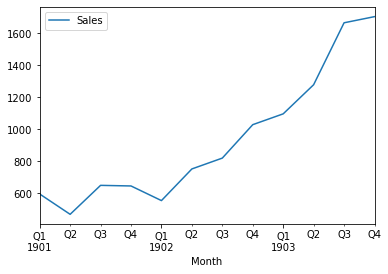

In [48]:
# now downsampling, from monthly to quaterly taking into account business quarters
quarterly_sum_sales = df.resample('Q').sum()
print(quarterly_sum_sales.head())
quarterly_sum_sales.plot()

             Sales
Month             
1901-12-31  2357.5
1902-12-31  3153.5
1903-12-31  5742.6


<AxesSubplot:xlabel='Month'>

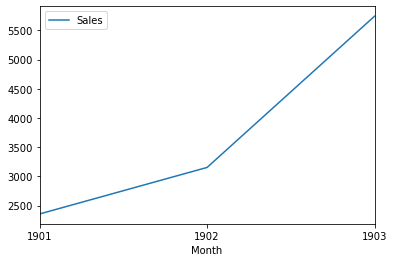

In [45]:
# yearly, but using sum and mean
yearly_sum = df.resample('A').sum()
print(yearly_sum.head())
yearly_sum.plot()

                 Sales
Month                 
1901-12-31  196.458333
1902-12-31  262.791667
1903-12-31  478.550000


<AxesSubplot:xlabel='Month'>

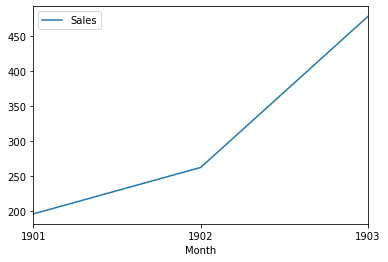

In [46]:
# yearly, but using sum and mean
yearly_mean = df.resample('A').mean()
print(yearly_mean.head())
yearly_mean.plot()